In [4]:
!pip install tensorflow==2.9.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 1.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 52.5 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 65.8 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 55.2 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.3.3
    Uninstalling flatbuffers-23.3.3:
      Successfully uninstalled flatbuffers-23.3.3
  A

In [49]:
import zipfile
from PIL import Image
import io
import tensorflow as tf
import tensorflow.keras.applications
import os
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB7
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.applications import EfficientNetB1
from tensorflow.keras.callbacks import EarlyStopping
import keras
from keras.applications.imagenet_utils import decode_predictions
import skimage.io 
import skimage.segmentation
import copy
import sklearn
import sklearn.metrics
from sklearn.linear_model import LinearRegression
import warnings
from sklearn.metrics import confusion_matrix

In [6]:
def importRealImages():
    folder_path = '/kaggle/input/wikiart-monet-renoir/claude-monet'
    real = []
    monet = 0

    for file_name in tqdm(os.listdir(folder_path)):
        file_path = os.path.join(folder_path, file_name)
        if os.path.isfile(file_path):
            monet += 1
            image = Image.open(file_path)
            image = image.resize((240, 240))
            image_array = np.array(image)
            real.append(image_array)

    folder_path = '/kaggle/input/wikiart-monet-renoir/pierre-auguste-renoir'
    renoir = 0

    for file_name in tqdm(os.listdir(folder_path)):
        file_path = os.path.join(folder_path, file_name)
        if os.path.isfile(file_path):
            renoir += 1
            image = Image.open(file_path)
            image = image.resize((240, 240))
            image_array = np.array(image)
            real.append(image_array)

    real = np.array(real)
    
    y = np.array([(0, 1) for x in range(monet)]+ [(1, 0) for x in range(renoir)])
    X_train, X_val, y_train, y_val = train_test_split(
        real, y, test_size=0.2, random_state=42
    )
    X_val, X_test, y_val, y_test = train_test_split(
        X_val, y_val, test_size=0.5, random_state=42
    )
    
    return X_train, X_val, X_test, y_train, y_val, y_test

In [12]:
def importSyntheticImages(): 
    synthetic = []
    monet = 0

    folder_path = '/kaggle/input/monet-synthetic/monet_seed168/monet_seed168'
    for file_name in tqdm(os.listdir(folder_path)):
        file_path = os.path.join(folder_path, file_name)
        if os.path.isfile(file_path):
            monet += 1
            image = Image.open(file_path)
            image = image.resize((240, 240))
            image_array = np.array(image)
            synthetic.append(image_array)

    folder_path = '/kaggle/input/monet-synthetic/monet_seed336/monet_seed336'
    for file_name in tqdm(os.listdir(folder_path)):
        file_path = os.path.join(folder_path, file_name)
        if os.path.isfile(file_path):
            monet += 1
            image = Image.open(file_path)
            image = image.resize((240, 240))
            image_array = np.array(image)
            synthetic.append(image_array)

    folder_path = '/kaggle/input/monet-synthetic/monet_seed42/monet_seed42'
    for file_name in tqdm(os.listdir(folder_path)):
        file_path = os.path.join(folder_path, file_name)
        if os.path.isfile(file_path):
            monet += 1
            image = Image.open(file_path)
            image = image.resize((240, 240))
            image_array = np.array(image)
            synthetic.append(image_array)

    folder_path = '/kaggle/input/monet-synthetic/monet_seed84/monet_seed84'
    for file_name in tqdm(os.listdir(folder_path)):
        file_path = os.path.join(folder_path, file_name)
        if os.path.isfile(file_path):
            monet += 1
            image = Image.open(file_path)
            image = image.resize((240, 240))
            image_array = np.array(image)
            synthetic.append(image_array)

    renoir = 0
    folder_path = '/kaggle/input/renoir-synthetic/renoir_seed42/renoir_seed42'
    for file_name in tqdm(os.listdir(folder_path)):
        file_path = os.path.join(folder_path, file_name)
        if os.path.isfile(file_path):
            renoir += 1
            image = Image.open(file_path)
            image = image.resize((240, 240))
            image_array = np.array(image)
            synthetic.append(image_array)

    folder_path = '/kaggle/input/renoir-synthetic/renoir_seed84/renoir_seed84'
    for file_name in tqdm(os.listdir(folder_path)):
        file_path = os.path.join(folder_path, file_name)
        if os.path.isfile(file_path):
            renoir += 1
            image = Image.open(file_path)
            image = image.resize((240, 240))
            image_array = np.array(image)
            synthetic.append(image_array)

    synthetic = np.array(synthetic)
    
    y = np.array([(0, 1) for x in range(monet)]+ [(1, 0) for x in range(renoir)])
    X_train, X_val, y_train, y_val = train_test_split(
        synthetic, y, test_size=0.2, random_state=42
    )
    X_val, X_test, y_val, y_test = train_test_split(
        X_val, y_val, test_size=0.5, random_state=42
    )
    
    return X_train, X_val, X_test, y_train, y_val, y_test

In [17]:
def concatenate_and_shuffle(X1, y1, X2, y2, random_seed=None):
    # Check if the arrays have the same length
    if len(X1) != len(y1) or len(X2) != len(y2):
        raise ValueError("Arrays must have the same length.")

    # Set random seed if provided
    if random_seed is not None:
        np.random.seed(random_seed)

    # Concatenate X arrays
    X_concatenated = np.concatenate((X1, X2), axis=0)

    # Concatenate y arrays
    y_concatenated = np.concatenate((y1, y2), axis=0)

    # Generate shuffled indices
    indices = np.arange(len(X_concatenated))
    np.random.shuffle(indices)

    # Shuffle X and y arrays using the shuffled indices
    X_shuffled = X_concatenated[indices]
    y_shuffled = y_concatenated[indices]

    return X_shuffled, y_shuffled

In [10]:
X_train_r, X_val_r, X_test_r, y_train_r, y_val_r, y_test_r = importRealImages()

100%|██████████| 1376/1376 [01:16<00:00, 17.88it/s]


In [14]:
X_train_s, X_val_s, X_test_s, y_train_s, y_val_s, y_test_s = importSyntheticImages()

100%|██████████| 800/800 [00:20<00:00, 39.18it/s]


In [23]:
X_train_a, y_train_a = concatenate_and_shuffle(X_train_r, y_train_r, X_train_s, y_train_s, 42)
X_val_a, y_val_a = concatenate_and_shuffle(X_val_r, y_val_r, X_val_s, y_val_s, 42)
X_test_a, y_test_a = concatenate_and_shuffle(X_test_r, y_test_r, X_test_s, y_test_s, 42)

In [29]:
def getModel():
    base_model = EfficientNetB1(weights='imagenet')
    model = tf.keras.Sequential([
        base_model,
        tf.keras.layers.Dense(2, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [30]:
model_r = getModel() #imagens reais
model_s = getModel() #imagens sinteticas
model_a = getModel() #imagens reais + data augmentation

32148312/32148312 [==============================] - 2s 0us/step


In [37]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
history_r = model_r.fit(X_train_r, y_train_r, validation_data=(X_val_r, y_val_r), callbacks=[early_stopping], batch_size=32, epochs=50)

Epoch 1/50
68/68 [==============================] - 24s 358ms/step - loss: 0.1212 - accuracy: 0.9814 - val_loss: 0.2465 - val_accuracy: 0.9222
Epoch 2/50
68/68 [==============================] - 24s 356ms/step - loss: 0.1091 - accuracy: 0.9819 - val_loss: 0.2037 - val_accuracy: 0.9370
Epoch 3/50
68/68 [==============================] - 24s 355ms/step - loss: 0.0952 - accuracy: 0.9861 - val_loss: 0.2132 - val_accuracy: 0.9370
Epoch 4/50
68/68 [==============================] - 24s 355ms/step - loss: 0.0827 - accuracy: 0.9903 - val_loss: 0.2540 - val_accuracy: 0.9222
Epoch 5/50
68/68 [==============================] - 24s 355ms/step - loss: 0.0862 - accuracy: 0.9884 - val_loss: 0.2222 - val_accuracy: 0.9296
Epoch 6/50
68/68 [==============================] - 24s 359ms/step - loss: 0.0778 - accuracy: 0.9912 - val_loss: 0.1865 - val_accuracy: 0.9519
Epoch 7/50
68/68 [==============================] - 24s 354ms/step - loss: 0.0831 - accuracy: 0.9875 - val_loss: 0.2750 - val_accuracy: 0.9037

In [36]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
history_a = model_a.fit(X_train_a, y_train_a, validation_data=(X_val_r, y_val_r), callbacks=[early_stopping], batch_size=32, epochs=50)

Epoch 1/50
158/158 [==============================] - 57s 358ms/step - loss: 0.1435 - accuracy: 0.9649 - val_loss: 0.1775 - val_accuracy: 0.9333
Epoch 2/50
158/158 [==============================] - 57s 358ms/step - loss: 0.1253 - accuracy: 0.9682 - val_loss: 0.1953 - val_accuracy: 0.9444
Epoch 3/50
158/158 [==============================] - 56s 357ms/step - loss: 0.1030 - accuracy: 0.9764 - val_loss: 0.2197 - val_accuracy: 0.9333
Epoch 4/50
158/158 [==============================] - 57s 358ms/step - loss: 0.0897 - accuracy: 0.9807 - val_loss: 0.1453 - val_accuracy: 0.9556
Epoch 5/50
158/158 [==============================] - 56s 357ms/step - loss: 0.0760 - accuracy: 0.9833 - val_loss: 0.2724 - val_accuracy: 0.9222
Epoch 6/50
158/158 [==============================] - 56s 356ms/step - loss: 0.0900 - accuracy: 0.9760 - val_loss: 0.1569 - val_accuracy: 0.9444
Epoch 7/50
158/158 [==============================] - 56s 356ms/step - loss: 0.0670 - accuracy: 0.9835 - val_loss: 0.1561 - val_ac

In [38]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
history_s = model_s.fit(X_train_s, y_train_s, validation_data=(X_val_s, y_val_s), callbacks=[early_stopping], batch_size=32, epochs=50)

Epoch 1/50
90/90 [==============================] - 46s 382ms/step - loss: 0.6077 - accuracy: 0.9306 - val_loss: 0.5753 - val_accuracy: 0.9000
Epoch 2/50
90/90 [==============================] - 32s 355ms/step - loss: 0.5236 - accuracy: 0.9483 - val_loss: 0.4900 - val_accuracy: 0.9389
Epoch 3/50
90/90 [==============================] - 31s 350ms/step - loss: 0.4881 - accuracy: 0.9028 - val_loss: 0.4608 - val_accuracy: 0.9111
Epoch 4/50
90/90 [==============================] - 32s 354ms/step - loss: 0.4035 - accuracy: 0.9642 - val_loss: 0.3588 - val_accuracy: 0.9889
Epoch 5/50
90/90 [==============================] - 32s 352ms/step - loss: 0.3590 - accuracy: 0.9653 - val_loss: 0.3214 - val_accuracy: 0.9889
Epoch 6/50
90/90 [==============================] - 32s 352ms/step - loss: 0.3567 - accuracy: 0.9375 - val_loss: 0.4069 - val_accuracy: 0.8944
Epoch 7/50
90/90 [==============================] - 32s 352ms/step - loss: 0.3440 - accuracy: 0.9247 - val_loss: 0.5642 - val_accuracy: 0.7694

In [48]:
model_r.save('model_r.h5')
model_s.save('model_s.h5')
model_a.save('model_a.h5')

In [42]:
def showLossAndAccuracy(model, X_test, y_test):
    loss, accuracy = model.evaluate(X_test, y_test)
    print('Accuracy: ', accuracy)

In [43]:
showLossAndAccuracy(model_r, X_test_r, y_test_r)
showLossAndAccuracy(model_r, X_test_s, y_test_s)

showLossAndAccuracy(model_s, X_test_r, y_test_r)
showLossAndAccuracy(model_s, X_test_s, y_test_s)

showLossAndAccuracy(model_a, X_test_r, y_test_r)
showLossAndAccuracy(model_a, X_test_s, y_test_s)

9/9 [==============================] - 1s 55ms/step - loss: 0.1282 - accuracy: 0.9667
Accuracy:  0.9666666388511658
12/12 [==============================] - 2s 130ms/step - loss: 0.7272 - accuracy: 0.7500
Accuracy:  0.75
9/9 [==============================] - 1s 56ms/step - loss: 0.6550 - accuracy: 0.6630
Accuracy:  0.6629629731178284
12/12 [==============================] - 1s 55ms/step - loss: 0.3542 - accuracy: 0.9889
Accuracy:  0.9888888597488403
9/9 [==============================] - 1s 55ms/step - loss: 0.1462 - accuracy: 0.9667
Accuracy:  0.9666666388511658
12/12 [==============================] - 1s 54ms/step - loss: 0.0141 - accuracy: 1.0000
Accuracy:  1.0


In [53]:
def getConfusionMatrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)
    cm = confusion_matrix(y_true_classes, y_pred_classes)
    return cm

In [54]:
confusionMatrix = []

confusionMatrix.append(getConfusionMatrix(model_r, X_test_r, y_test_r))
confusionMatrix.append(getConfusionMatrix(model_s, X_test_r, y_test_r))
confusionMatrix.append(getConfusionMatrix(model_a, X_test_r, y_test_r))
confusionMatrix.append(getConfusionMatrix(model_r, X_test_s, y_test_s))
confusionMatrix.append(getConfusionMatrix(model_s, X_test_s, y_test_s))
confusionMatrix.append(getConfusionMatrix(model_a, X_test_s, y_test_s))


12/12 [==============================] - 1s 52ms/step


In [75]:
import seaborn as sns


def plot_confusion_matrix(cm, class_labels):
    fig, ax = plt.subplots(figsize=(1.5, 1.2))
    heatmap = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(class_labels)
    ax.yaxis.set_ticklabels(class_labels)
    plt.xticks(rotation=45)
    plt.show()
    return plt

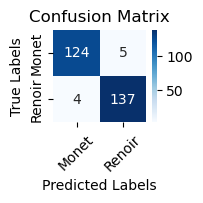

<Figure size 640x480 with 0 Axes>

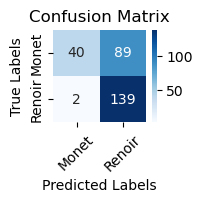

<Figure size 640x480 with 0 Axes>

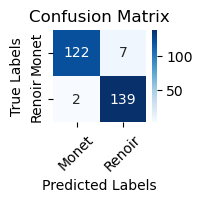

<Figure size 640x480 with 0 Axes>

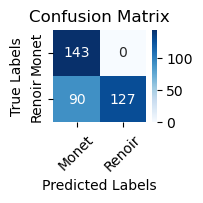

<Figure size 640x480 with 0 Axes>

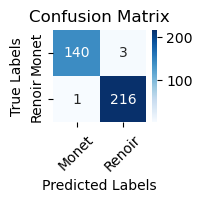

<Figure size 640x480 with 0 Axes>

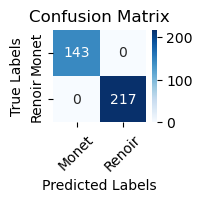

<Figure size 640x480 with 0 Axes>

In [76]:
labels = ['rr', 'sr', 'ar', 'rs', 'ss', 'as']
for i, cm in enumerate(confusionMatrix):
    fig = plot_confusion_matrix(cm, ['Monet', 'Renoir'])
    fig.savefig(fname=labels[i] + '.png')

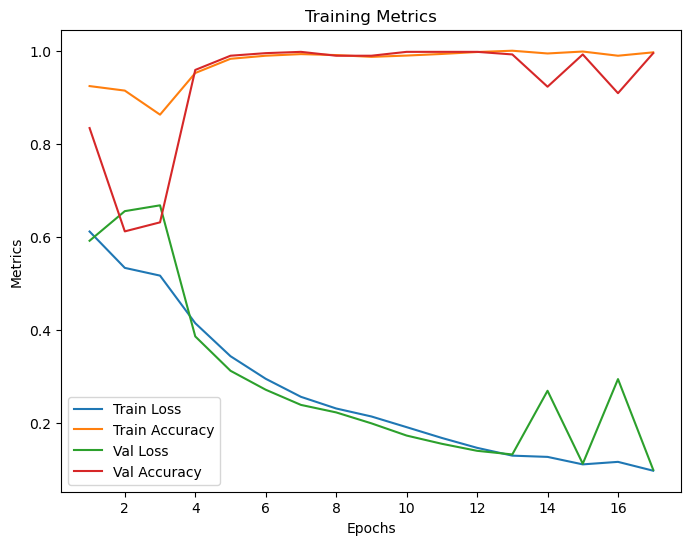

In [18]:
# Extract the training metrics from the history object
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']

# Extract the validation metrics from the history object (if applicable)
val_loss = history.history.get('val_loss')
val_accuracy = history.history.get('val_accuracy')

# Plot the training metrics
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train Loss')
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train Accuracy')

# Plot the validation metrics if available
if val_loss is not None:
    plt.plot(range(1, len(val_loss) + 1), val_loss, label='Val Loss')
if val_accuracy is not None:
    plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Val Accuracy')

# Set the plot title and labels
plt.title('Training Metrics')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()

# Show the plot
plt.show()

In [77]:
!pip install lime

In [78]:
from lime import lime_image
from skimage.segmentation import slic
import cv2

In [79]:
def perturb_image(img,perturbation,segments):
    active_pixels = np.where(perturbation == 1)[0]
    mask = np.zeros(segments.shape)
    for active in active_pixels:
          mask[segments == active] = 1 
    perturbed_image = copy.deepcopy(img)
    perturbed_image = perturbed_image*mask[:,:,np.newaxis]
    return perturbed_image

In [85]:
def getMostImportantRegion(image, model, num_perturb=50):
    Xi = image
    np.random.seed(222)
    preds = model.predict(Xi[np.newaxis, :, :, :], verbose=False)
    top_pred_classes = preds[0].argsort()[-2:][::-1]  # Index of top 2 classes
    class_labels = ['Monet','Renoir']  # Replace with actual class labels
    superpixels = skimage.segmentation.quickshift(Xi, kernel_size=3, max_dist=10, ratio=0.2)
    num_superpixels = np.unique(superpixels).shape[0]
    perturbations = np.random.binomial(1, 0.5, size=(num_perturb, num_superpixels))
    perturbations[0]  # Show example of perturbation
    predictions = []
    for pert in perturbations:
        perturbed_img = perturb_image(Xi, pert, superpixels)
        pred = model.predict(perturbed_img[np.newaxis, :, :, :], verbose=False)
        predictions.append(pred)

    predictions = np.array(predictions)
    original_image = np.ones(num_superpixels)[np.newaxis, :]  # Perturbation with all superpixels enabled
    distances = sklearn.metrics.pairwise_distances(perturbations, original_image, metric='cosine').ravel()
    kernel_width = 0.25
    weights = np.sqrt(np.exp(-(distances ** 2) / kernel_width ** 2))  # Kernel function

    class_to_explain = top_pred_classes[0]
    simpler_model = LinearRegression()
    simpler_model.fit(X=perturbations, y=predictions[:, :, class_to_explain], sample_weight=weights)
    coeff = simpler_model.coef_[0]
    num_top_features = 4
    top_features = np.argsort(coeff)[-num_top_features:]
    mask = np.zeros(num_superpixels)
    mask[top_features] = True  # Activate top superpixels
    
    perturbed_image = perturb_image(Xi, mask, superpixels)
    return perturbed_image, Xi, mask, superpixels

In [86]:
def apply_mask(photo, mask):
    # Convert the mask to a binary mask (black and white)
    mask = np.where(mask > 0, 1, 0)
    
    # Ensure photo and mask have the same shape
    if len(photo.shape) != len(mask.shape):
        mask = np.expand_dims(mask, axis=-1)
    
    # Multiply the photo with the mask to keep the white part and make black where the mask is black
    result = photo * mask
    
    return result

In [119]:
def getHeatMaps(model, X_test, y_test):
    test_results = {
        'image': {
            'monet': [],
            'renoir': []
        },
        'perturbed_image': {
            'monet': [],
            'renoir': []
        }
    }
    
    monet_test = []
    renoir_test = []

    for i in range(len(X_test)):
        if list(y_test[i]) == [0, 1]:
            monet_test.append(X_test[i])
        else: 
            renoir_test.append(X_test[i])
    monet_test = np.array(monet_test)
    renoir_test = np.array(renoir_test)
    
    for i in tqdm(range(len(monet_test))):
        perturbed_image, Xi, mask, superpixels = getMostImportantRegion(monet_test[i], model, 50)
        test_results['image']['monet'].append(Xi)
        test_results['perturbed_image']['monet'].append(perturbed_image)
    for i in tqdm(range(len(renoir_test))):
        perturbed_image, Xi, mask, superpixels = getMostImportantRegion(renoir_test[i], model, 50)
        test_results['image']['renoir'].append(Xi)
        test_results['perturbed_image']['renoir'].append(perturbed_image)
    
    return test_results

In [120]:
test_results_rr = getHeatMaps(model_r, X_test_r, y_test_r)

100%|██████████| 129/129 [07:50<00:00,  3.64s/it]


In [133]:
test_results_rs = getHeatMaps(model_r, X_test_s, y_test_s)

100%|██████████| 143/143 [09:06<00:00,  3.82s/it]


In [139]:
test_results_sr = getHeatMaps(model_s, X_test_r, y_test_r)

100%|██████████| 129/129 [08:18<00:00,  3.87s/it]


In [145]:
test_results_ss = getHeatMaps(model_s, X_test_s, y_test_s)

100%|██████████| 143/143 [08:57<00:00,  3.76s/it]


In [151]:
test_results_ar = getHeatMaps(model_a, X_test_r, y_test_r)

100%|██████████| 129/129 [08:00<00:00,  3.73s/it]


In [163]:
test_results_as = getHeatMaps(model_a, X_test_s, y_test_s)

100%|██████████| 143/143 [09:04<00:00,  3.81s/it]


(0,1) monet
(1,0) renoir

In [126]:
def buildHeatMap(limeImages):
    perturbed_images = limeImages
    heatmap = limeImages[0]
    for i in range(1, len(perturbed_images)):
        heatmap += perturbed_images[i]
    heatmap = np.mean(heatmap, axis=2, keepdims=True)
    heatmap = heatmap / heatmap.max()
    return heatmap

In [158]:
monet_heatmap = buildHeatMap(test_results_as['perturbed_image']['monet'])
renoir_heatmap = buildHeatMap(test_results_as['perturbed_image']['renoir'])

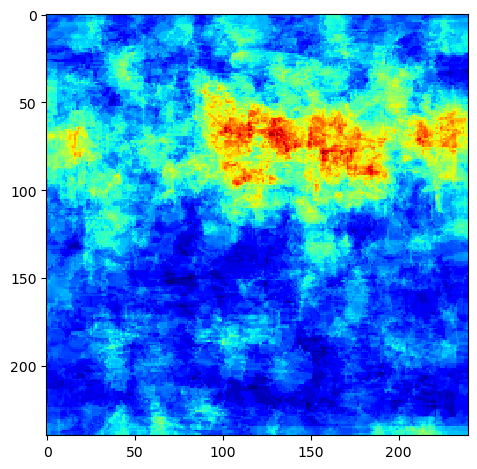

In [159]:
skimage.io.imshow(monet_heatmap, cmap='jet')

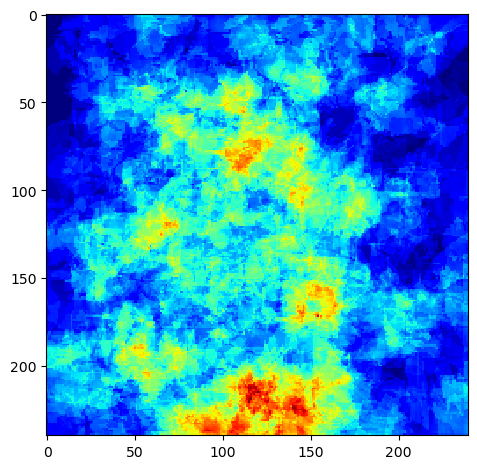

In [160]:
skimage.io.imshow(renoir_heatmap, cmap='jet')

In [161]:
heatmap = monet_heatmap + renoir_heatmap

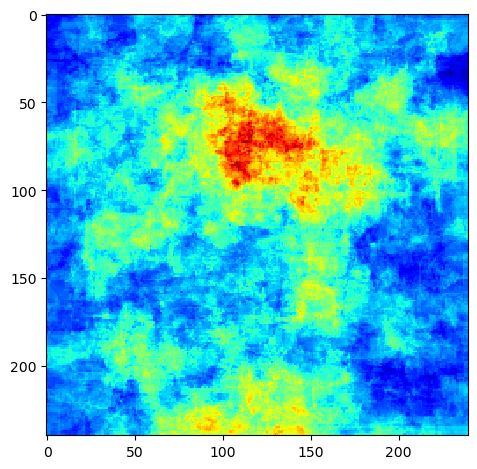

In [162]:
skimage.io.imshow(heatmap / heatmap.max(), cmap='jet')